 
# Alpha and Beta Diversity

Different higher-level measures are often used to describe the microbiome in a sample. These do not provide information on changes in the abundance of specific taxa but allow us to access a broader change or difference in the composition of microorganisms. Alpha and beta diversity are examples of such measures.

Different measures exist to estimate diversity within a single sample, jointly called alpha diversity. The different measures reflect the richness (number) or distribution (evenness) of a microbial sample or aim to reflect a combination of both properties.

Rarefaction curves are often used when calculating alpha diversity indices because increasing numbers of sequenced taxa allow increasingly accurate estimates of total population diversity. Rarefaction curves can therefore be used to estimate the full sample richness, as compared to the observed sample richness.

While alpha diversity is a measure of microbiome diversity applicable to a single sample, beta diversity is a measure of the similarity or dissimilarity of two communities. As for alpha diversity, many indices exist, each reflecting different aspects of community heterogeneity. Key differences relate to how the indices value variation in rare species if they consider presence/absence only or incorporate abundance, and how they interpret shared absence. Bray-Curtis dissimilarity is a popular measure that considers both size (overall abundance per sample) and shape (abundance of each taxon) of the communities (Bray, 1957). Beta diversity is an essential measure for many popular statistical methods in ecology, such as ordination-based methods, and is widely used for studying the association between environmental variables and microbial composition.

In summary, alpha diversity measures can be seen as a summary statistic of a single population (within-sample diversity), while beta diversity measures are estimates of similarity or dissimilarity between populations (between samples).

**Source**: (https://biomcare.com/info/key-terms-in-microbiome-projects/)

### STEP : Diversity Analysis

Using QIIME2 to create diversity analisys graphs and calculations.

- [QIIME2 Workflow Overview](https://docs.qiime2.org/2022.8/tutorials/overview/)


#### Methods
- [diversity](https://docs.qiime2.org/2022.8/plugins/available/diversity/)
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/)
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/)
- [diversity core_metrics](https://docs.qiime2.org/2022.8/plugins/available/diversity/core-metrics/)
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)
- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/)
- [feature_table core_features](https://docs.qiime2.org/2022.8/plugins/available/feature-table/core-features/)
- [feature_table summarize](https://docs.qiime2.org/2022.8/plugins/available/feature-table/summarize/)
- [taxa filter-table](https://docs.qiime2.org/2022.8/plugins/available/taxa/filter-table/)
- [taxa collapse](https://docs.qiime2.org/2022.8/plugins/available/taxa/collapse/)

## Setup and settings

In [1]:
# Importing packages
import os
import pandas as pd
from qiime2 import Artifact
from qiime2 import Visualization
from qiime2 import Metadata

from qiime2.plugins.phylogeny.pipelines import align_to_tree_mafft_fasttree

from qiime2.plugins.diversity.pipelines import alpha
from qiime2.plugins.diversity.pipelines import beta
from qiime2.plugins.diversity.pipelines import core_metrics
from qiime2.plugins.diversity.pipelines import alpha_phylogenetic

from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.diversity.visualizers import beta_group_significance
from qiime2.plugins.diversity.visualizers import alpha_correlation
from qiime2.plugins.diversity.visualizers import beta_rarefaction

from qiime2.plugins.taxa.methods import filter_table
from qiime2.plugins.taxa.methods import collapse

from qiime2.plugins.feature_table.visualizers import tabulate_seqs
from qiime2.plugins.feature_table.visualizers import summarize
from qiime2.plugins.feature_table.visualizers import core_features

from qiime2.plugins.alignment.methods import mafft


import matplotlib.pyplot as plt

%matplotlib inline

### Receiving the parameters

The following cell can receive parameters using the [papermill](https://papermill.readthedocs.io/en/latest/) tool.

In [2]:
metadata_file = '/home/lauro/nupeb/rede-micro/redemicro-miliane-nutri/data/raw/metadata/miliane-metadata-CxAC.tsv'
base_dir = os.path.join('/', 'home', 'lauro', 'nupeb', 'rede-micro', 'redemicro-miliane-nutri')
experiment_name = 'miliane-CxAC-trim'
class_col = 'group-id'
replace_files = False

In [3]:
# Parameters
experiment_name = "thayane-PM"
base_dir = "/home/lauro/nupeb/rede-micro/redemicro-thayane"
manifest_file = "/home/lauro/nupeb/rede-micro/redemicro-thayane/data/manifest.csv"
metadata_file = "/home/lauro/nupeb/rede-micro/redemicro-thayane/data/metadata.tsv"
class_col = "menopausa-age-qcut"
classifier_file = (
    "/home/lauro/nupeb/16S_classifiers_qiime2/silva-138-99-nb-classifier.qza"
)
replace_files = False
phred = 20
trunc_f = 0
trunc_r = 0
overlap = 12
threads = 6


In [4]:
experiment_folder = os.path.abspath(os.path.join(base_dir, 'experiments', experiment_name))
img_folder = os.path.abspath(os.path.join(experiment_folder, 'imgs'))

### Defining names, paths and flags

In [5]:
# QIIME2 Artifacts folder
qiime_folder = os.path.join(experiment_folder, 'qiime-artifacts')

# Input - DADA2 Artifacts
dada2_tabs_path = os.path.join(qiime_folder, 'dada2-tabs.qza')
dada2_reps_path = os.path.join(qiime_folder, 'dada2-reps.qza')
dada2_stat_path = os.path.join(qiime_folder, 'dada2-stat.qza')

# Input - Taxonaomic Artifacts
taxonomy_path = os.path.join(qiime_folder, 'metatax.qza')

# Output -Diversity Artifacts
alpha_diversity_path = os.path.join(qiime_folder, 'alpha-diversity.qza')
alpha_diversity_view_path = os.path.join(qiime_folder, 'alpha-diversity.qzv')
beta_diversity_path = os.path.join(qiime_folder, 'beta-diversity.qza')
beta_diversity_view_path = os.path.join(qiime_folder, 'beta-diversity.qzv')

dada2_tabs_view = os.path.join(qiime_folder, 'dada2-tabs.qzv')
dada2_reps_view = os.path.join(qiime_folder, 'dada2-reps.qzv')
dada2_core_view = os.path.join(qiime_folder, 'dada2-core.qzv')

# Flag - Load or create files
need_tax = not (os.path.isfile(alpha_diversity_path)) or replace_files
need_view = not (os.path.isfile(alpha_diversity_view_path)) or replace_files

In [6]:
def filter_and_collapse(tab, seqs, tax, meta, lvl, exclude=True, exclude_list='uncultured,unidentified,metagenome'):
    from qiime2.plugins.taxa.methods import collapse
    from qiime2.plugins.taxa.methods import filter_table
    from qiime2.plugins.feature_table.methods import filter_seqs
    from qiime2.plugins.feature_table.visualizers import summarize
    
    to_include = ('d', 'p', 'c', 'o', 'f', 'g', 's')[lvl-1]
    to_include += '__'
    to_exclude = exclude_list if exclude else None
    
    filtered_tabs = filter_table(
        table=tab, 
        taxonomy=tax,
        include=to_include,
        exclude=to_exclude,
        mode='contains').filtered_table
    
    filtered_seqs = filter_seqs(
        data = seqs,
        table = filtered_tabs,
    ).filtered_data
    
    collapsed_table = collapse(table=filtered_tabs, taxonomy=tax, level=lvl).collapsed_table
    collapsed_table_view = summarize(table=collapsed_table, sample_metadata=meta).visualization
    
    return collapsed_table, collapsed_table_view, filtered_seqs

## Step execution

### Load input files

This Step import the QIIME2 `FeatureTable[Frequency]` Artifact and the `Metadata` file.

In [7]:
#Load Metadata
metadata_qa = Metadata.load(metadata_file)

#Load FeatureTable[Frequency]
tabs = Artifact.load(dada2_tabs_path)
tabs_df = tabs.view(Metadata).to_dataframe().T

# FeatureData[Sequence]
reps = Artifact.load(dada2_reps_path)

# FeatureData[Taxonomy]
tax = Artifact.load(taxonomy_path)

In [8]:
# lvl = 7
# exclude = True
# tabs, collapsed_table_view, reps = filter_and_collapse(
#                     tabs, reps, tax, metadata_qa, 
#                     lvl=lvl,
#                     exclude=exclude, 
#                     exclude_list='uncultured,unidentified,metagenome')
# collapsed_table_view

'/home/lauro/nupeb/rede-micro/redemicro-thayane/experiments/thayane-PM/qiime-artifacts/dada2-core.qzv'

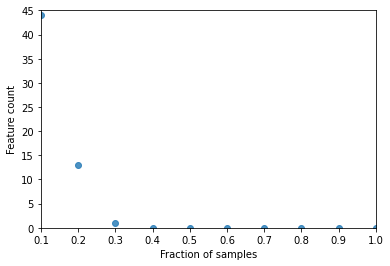

In [9]:
tabs_view = summarize(table=tabs, sample_metadata=metadata_qa).visualization
tabs_view.save(dada2_tabs_view)
reps_view = tabulate_seqs(data=reps).visualization
reps_view.save(dada2_reps_view)
core_view = core_features(table=tabs, min_fraction=.1, steps=10).visualization
core_view.save(dada2_core_view)

In [10]:
# import zipfile
# from io import StringIO
# import pandas as pd
# with zipfile.ZipFile(dada2_core_view, 'r') as zip_ref:
#     names = [x for x in zip_ref.namelist() if x.endswith('1.000.tsv')]
#     print(names)
#     with zip_ref.open(names[0]) as myfile:
#         txt = str(myfile.read(), 'utf-8')
#         txt = StringIO(txt)
#         df = pd.read_csv(txt, sep='\t')
#         print(df)   

## Alpha diversity analysis

#### Reference
- [The Use and Types of Alpha-Diversity Metrics in Microbial NGS](https://www.cd-genomics.com/microbioseq/the-use-and-types-of-alpha-diversity-metrics-in-microbial-ngs.html)
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)

#### Methods
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a
feature table.
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all
samples in a feature table.
- [diversity alpha_correlation](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-correlation/): Determine whether numeric sample metadata columns are correlated with alpha diversity.
- [diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/): Visually and statistically compare groups of alpha diversity values.

### Compute Alpha Diversity vectors
- [diversity alpha](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha/): Computes a user-specified alpha diversity metric for all samples in a feature table.
- [Alpha diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.alpha.html)
 - Choices: ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')

In [11]:
metrics = ('ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'chao1_ci', 'dominance', 'doubles', 'enspie', 'esty_ci', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'kempton_taylor_q', 'lladser_pe', 'margalef', 'mcintosh_d', 'mcintosh_e', 'menhinick', 'michaelis_menten_fit', 'observed_features', 'osd', 'pielou_e', 'robbins', 'shannon', 'simpson', 'simpson_e', 'singles', 'strong')
alpha_diversities = dict()
for metric in metrics:
    print(f"Calculating alpha diversty: {metric}")
    try:
        alpha_diversity = alpha(table=tabs, metric=metric).alpha_diversity
        alpha_diversities[metric] = alpha_diversity
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")
        print(e)

Calculating alpha diversty: ace
ERROR: Calculating alpha diversty: ace
index 1 is out of bounds for axis 0 with size 1
Calculating alpha diversty: berger_parker_d
DONE: Calculating alpha diversty: berger_parker_d
Calculating alpha diversty: brillouin_d
DONE: Calculating alpha diversty: brillouin_d
Calculating alpha diversty: chao1
DONE: Calculating alpha diversty: chao1
Calculating alpha diversty: chao1_ci


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:55: RuntimeWarning: invalid value encountered in long_scalars
  return counts.max() / counts.sum()
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:95: RuntimeWarning: invalid value encountered in double_scalars
  return (gammaln(n + 1) - gammaln(nz + 1).sum()) / n
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_chao1.py:217: RuntimeWarning: invalid value encountered in long_scalars
  P = np.exp(-n / s)


DONE: Calculating alpha diversty: chao1_ci
Calculating alpha diversty: dominance
DONE: Calculating alpha diversty: dominance
Calculating alpha diversty: doubles
DONE: Calculating alpha diversty: doubles
Calculating alpha diversty: enspie
DONE: Calculating alpha diversty: enspie
Calculating alpha diversty: esty_ci


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:138: RuntimeWarning: invalid value encountered in true_divide
  freqs = counts / counts.sum()
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:253: RuntimeWarning: invalid value encountered in long_scalars
  W = (f1 * (n - f1) + 2 * n * f2) / (n ** 3)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:255: RuntimeWarning: invalid value encountered in long_scalars
  return f1 / n - z * np.sqrt(W), f1 / n + z * np.sqrt(W)


DONE: Calculating alpha diversty: esty_ci
Calculating alpha diversty: fisher_alpha
DONE: Calculating alpha diversty: fisher_alpha
Calculating alpha diversty: gini_index
DONE: Calculating alpha diversty: gini_index
Calculating alpha diversty: goods_coverage
DONE: Calculating alpha diversty: goods_coverage
Calculating alpha diversty: heip_e


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_gini.py:95: RuntimeWarning: invalid value encountered in true_divide
  return np.arange(1, n + 1) / n, sorted_data.cumsum() / Sn
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:347: RuntimeWarning: invalid value encountered in long_scalars
  return 1 - (f1 / N)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:869: RuntimeWarning: invalid value encountered in true_divide
  freqs = counts / counts.sum()
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:440: RuntimeWarning: invalid value encountered in long_scalars
  return (upper - lower) / np.log(sorted_counts[upper] /


DONE: Calculating alpha diversty: heip_e
Calculating alpha diversty: kempton_taylor_q
DONE: Calculating alpha diversty: kempton_taylor_q
Calculating alpha diversty: lladser_pe


DONE: Calculating alpha diversty: lladser_pe
Calculating alpha diversty: margalef
DONE: Calculating alpha diversty: margalef
Calculating alpha diversty: mcintosh_d
DONE: Calculating alpha diversty: mcintosh_d
Calculating alpha diversty: mcintosh_e
DONE: Calculating alpha diversty: mcintosh_e
Calculating alpha diversty: menhinick
DONE: Calculating alpha diversty: menhinick
Calculating alpha diversty: michaelis_menten_fit


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:480: RuntimeWarning: divide by zero encountered in log
  return (observed_otus(counts) - 1) / np.log(counts.sum())
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:532: RuntimeWarning: invalid value encountered in double_scalars
  return (n - u) / (n - np.sqrt(n))
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:579: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:618: RuntimeWarning: invalid value encountered in true_divide
  return observed_otus(counts) / np.sqrt(counts.sum())


DONE: Calculating alpha diversty: michaelis_menten_fit
Calculating alpha diversty: observed_features
DONE: Calculating alpha diversty: observed_features
Calculating alpha diversty: osd
DONE: Calculating alpha diversty: osd
Calculating alpha diversty: pielou_e
DONE: Calculating alpha diversty: pielou_e
Calculating alpha diversty: robbins
DONE: Calculating alpha diversty: robbins
Calculating alpha diversty: shannon


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:793: RuntimeWarning: divide by zero encountered in log
  return shannon(counts, base=np.e) / np.log(observed_otus(counts))
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:829: RuntimeWarning: invalid value encountered in long_scalars
  return singles(counts) / counts.sum()


DONE: Calculating alpha diversty: shannon
Calculating alpha diversty: simpson
DONE: Calculating alpha diversty: simpson
Calculating alpha diversty: simpson_e
DONE: Calculating alpha diversty: simpson_e
Calculating alpha diversty: singles
DONE: Calculating alpha diversty: singles
Calculating alpha diversty: strong


DONE: Calculating alpha diversty: strong


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:1021: RuntimeWarning: invalid value encountered in true_divide
  return (sorted_sum / n - (i / s)).max()
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/diversity/alpha/_base.py:1021: RuntimeWarning: divide by zero encountered in true_divide
  return (sorted_sum / n - (i / s)).max()


### Create Phylogenetic inference

- [alignment align_to_tree_mafft_fasttree](https://docs.qiime2.org/2022.8/plugins/available/phylogeny/align-to-tree-mafft-fasttree/): Build a phylogenetic tree using fasttree and mafft alignment

This pipeline will start by creating a sequence alignment using MAFFT,
after which any alignment columns that are phylogenetically uninformative
or ambiguously aligned will be removed (masked). The resulting masked
alignment will be used to infer a phylogenetic tree and then subsequently
rooted at its midpoint. Output files from each step of the pipeline will be
saved. This includes both the unmasked and masked MAFFT alignment from
q2-alignment methods, and both the rooted and unrooted phylogenies from
q2-phylogeny methods.


Returns
- alignment : FeatureData[AlignedSequence] : The aligned sequences.
- masked_alignment : FeatureData[AlignedSequence] : The masked alignment.
- tree : Phylogeny[Unrooted] : The unrooted phylogenetic tree.
- rooted_tree : Phylogeny[Rooted] : The rooted phylogenetic tree.

In [12]:
mafft_alignment, mafft_masked_alignment, mafft_tree, mafft_rooted_tree = align_to_tree_mafft_fasttree(
    sequences=reps, n_threads=6, )

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 6 /tmp/qiime2-archive-pxsug75o/13d02254-ae40-454f-83ff-29cf80d39c56/data/dna-sequences.fasta



inputfile = orig
1651 x 453 - 24 d
nthread = 6
nthreadpair = 6
nthreadtb = 6
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  301 / 1651 (thread    5)

 1001 / 1651 (thread    1)

 1601 / 1651 (thread    5)
done.

Constructing a UPGMA tree (efffree=0) ... 
 1640 / 1651
done.

Progressive alignment 1/2... 
STEP    92 / 1650 (thread    4) f

STEP   601 / 1650 (thread    5) f

STEP  1301 / 1650 (thread    5) f

STEP  1501 / 1650 (thread    4) f
Reallocating..done. *alloclen = 1908
STEP  1601 / 1650 (thread    0) f


done.

Making a distance matrix from msa.. 
  200 / 1651 (thread    5)

  600 / 1651 (thread    2)

 1300 / 1651 (thread    3)

 1600 / 1651 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
 1640 / 1651
done.

Progressive alignment 2/2... 
STEP   489 / 1650 (thread    3) f

STEP  1101 / 1650 (thread    3) f

STEP  1501 / 1650 (thread    3) f
Reallocating..done. *alloclen = 1909


STEP  1601 / 1650 (thread    1) d h


done.

disttbfast (nuc) Version 7.490
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
6 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.



Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTreeMP -quote -nt /tmp/qiime2-archive-4msdcwye/c7d1b9c0-7d66-485b-86c7-16713f78d93a/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3), OpenMP (6 threads)
Alignment: /tmp/qiime2-archive-4msdcwye/c7d1b9c0-7d66-485b-86c7-16713f78d93a/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.16 seconds: Joined    100 of   1630


      0.27 seconds: Joined    200 of   1630
      0.47 seconds: Joined    400 of   1630


      0.57 seconds: Joined    500 of   1630
      0.77 seconds: Joined    700 of   1630


      0.88 seconds: Joined    800 of   1630


      1.11 seconds: Joined   1000 of   1630


      1.33 seconds: Joined   1200 of   1630
      1.51 seconds: Joined   1400 of   1630


      1.68 seconds: Joined   1600 of   1630
Initial topology in 1.69 seconds
Refining topology: 43 rounds ME-NNIs, 2 rounds ME-SPRs, 21 rounds ML-NNIs
      1.78 seconds: ME NNI round 2 of 43, 801 of 1631 splits, 105 changes (max delta 0.020)


      1.88 seconds: ME NNI round 4 of 43, 601 of 1631 splits, 36 changes (max delta 0.015)
      2.00 seconds: SPR round   1 of   2, 101 of 3264 nodes


      2.12 seconds: SPR round   1 of   2, 301 of 3264 nodes
      2.24 seconds: SPR round   1 of   2, 501 of 3264 nodes


      2.36 seconds: SPR round   1 of   2, 701 of 3264 nodes
      2.48 seconds: SPR round   1 of   2, 901 of 3264 nodes


      2.62 seconds: SPR round   1 of   2, 1101 of 3264 nodes
      2.75 seconds: SPR round   1 of   2, 1301 of 3264 nodes


      2.88 seconds: SPR round   1 of   2, 1501 of 3264 nodes
      3.01 seconds: SPR round   1 of   2, 1701 of 3264 nodes


      3.14 seconds: SPR round   1 of   2, 1901 of 3264 nodes
      3.25 seconds: SPR round   1 of   2, 2101 of 3264 nodes


      3.39 seconds: SPR round   1 of   2, 2301 of 3264 nodes
      3.50 seconds: SPR round   1 of   2, 2501 of 3264 nodes


      3.62 seconds: SPR round   1 of   2, 2701 of 3264 nodes
      3.75 seconds: SPR round   1 of   2, 2901 of 3264 nodes


      3.85 seconds: SPR round   1 of   2, 3101 of 3264 nodes
      3.96 seconds: ME NNI round 15 of 43, 201 of 1631 splits, 6 changes (max delta 0.001)


      4.06 seconds: ME NNI round 18 of 43, 1 of 1631 splits
      4.21 seconds: SPR round   2 of   2, 301 of 3264 nodes


      4.37 seconds: SPR round   2 of   2, 601 of 3264 nodes
      4.48 seconds: SPR round   2 of   2, 801 of 3264 nodes


      4.59 seconds: SPR round   2 of   2, 1001 of 3264 nodes
      4.70 seconds: SPR round   2 of   2, 1201 of 3264 nodes


      4.80 seconds: SPR round   2 of   2, 1401 of 3264 nodes
      4.90 seconds: SPR round   2 of   2, 1601 of 3264 nodes


      5.01 seconds: SPR round   2 of   2, 1801 of 3264 nodes
      5.12 seconds: SPR round   2 of   2, 2001 of 3264 nodes


      5.23 seconds: SPR round   2 of   2, 2201 of 3264 nodes
      5.33 seconds: SPR round   2 of   2, 2401 of 3264 nodes


      5.46 seconds: SPR round   2 of   2, 2601 of 3264 nodes
      5.57 seconds: SPR round   2 of   2, 2801 of 3264 nodes


      5.68 seconds: SPR round   2 of   2, 3001 of 3264 nodes
      5.82 seconds: SPR round   2 of   2, 3201 of 3264 nodes


      5.92 seconds: ME NNI round 30 of 43, 301 of 1631 splits, 0 changes
Total branch-length 24.253 after 6.03 sec
      6.03 seconds: ML Lengths 1 of 1631 splits


      6.16 seconds: ML Lengths 401 of 1631 splits
      6.29 seconds: ML Lengths 801 of 1631 splits


      6.41 seconds: ML Lengths 1201 of 1631 splits
      6.53 seconds: ML Lengths 1601 of 1631 splits


      6.73 seconds: ML NNI round 1 of 21, 201 of 1631 splits, 55 changes (max delta 4.869)
      6.84 seconds: ML NNI round 1 of 21, 301 of 1631 splits, 78 changes (max delta 4.869)


      6.95 seconds: ML NNI round 1 of 21, 401 of 1631 splits, 112 changes (max delta 6.592)
      7.06 seconds: ML NNI round 1 of 21, 501 of 1631 splits, 145 changes (max delta 13.271)


      7.16 seconds: ML NNI round 1 of 21, 601 of 1631 splits, 175 changes (max delta 13.271)
      7.35 seconds: ML NNI round 1 of 21, 801 of 1631 splits, 226 changes (max delta 13.271)


      7.51 seconds: ML NNI round 1 of 21, 1001 of 1631 splits, 276 changes (max delta 13.271)
      7.70 seconds: ML NNI round 1 of 21, 1201 of 1631 splits, 326 changes (max delta 13.271)


      7.87 seconds: ML NNI round 1 of 21, 1401 of 1631 splits, 369 changes (max delta 13.271)
      8.05 seconds: ML NNI round 1 of 21, 1601 of 1631 splits, 416 changes (max delta 13.271)


ML-NNI round 1: LogLk = -59115.110 NNIs 425 max delta 13.27 Time 8.09
      8.16 seconds: Site likelihoods with rate category 3 of 20
      8.28 seconds: Site likelihoods with rate category 8 of 20


      8.41 seconds: Site likelihoods with rate category 13 of 20
      8.53 seconds: Site likelihoods with rate category 18 of 20
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.087 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods


      8.71 seconds: ML NNI round 2 of 21, 101 of 1631 splits, 10 changes (max delta 3.173)
      8.83 seconds: ML NNI round 2 of 21, 201 of 1631 splits, 26 changes (max delta 3.218)


      8.94 seconds: ML NNI round 2 of 21, 301 of 1631 splits, 47 changes (max delta 4.953)
      9.07 seconds: ML NNI round 2 of 21, 401 of 1631 splits, 70 changes (max delta 6.281)


      9.19 seconds: ML NNI round 2 of 21, 501 of 1631 splits, 89 changes (max delta 6.281)
      9.29 seconds: ML NNI round 2 of 21, 601 of 1631 splits, 100 changes (max delta 6.281)


      9.39 seconds: ML NNI round 2 of 21, 701 of 1631 splits, 113 changes (max delta 6.281)
      9.50 seconds: ML NNI round 2 of 21, 801 of 1631 splits, 129 changes (max delta 8.984)


      9.60 seconds: ML NNI round 2 of 21, 901 of 1631 splits, 148 changes (max delta 8.984)
      9.81 seconds: ML NNI round 2 of 21, 1101 of 1631 splits, 178 changes (max delta 8.984)


      9.99 seconds: ML NNI round 2 of 21, 1301 of 1631 splits, 221 changes (max delta 8.984)


     10.10 seconds: ML NNI round 2 of 21, 1401 of 1631 splits, 236 changes (max delta 8.984)
     10.20 seconds: ML NNI round 2 of 21, 1501 of 1631 splits, 251 changes (max delta 8.984)


     10.30 seconds: ML NNI round 2 of 21, 1601 of 1631 splits, 271 changes (max delta 8.984)
ML-NNI round 2: LogLk = -46557.444 NNIs 272 max delta 8.98 Time 10.34
     10.42 seconds: ML NNI round 3 of 21, 101 of 1631 splits, 11 changes (max delta 0.119)


     10.60 seconds: ML NNI round 3 of 21, 301 of 1631 splits, 29 changes (max delta 0.119)
     10.78 seconds: ML NNI round 3 of 21, 501 of 1631 splits, 55 changes (max delta 1.971)


     10.95 seconds: ML NNI round 3 of 21, 701 of 1631 splits, 71 changes (max delta 1.971)
     11.13 seconds: ML NNI round 3 of 21, 901 of 1631 splits, 97 changes (max delta 4.689)


     11.31 seconds: ML NNI round 3 of 21, 1101 of 1631 splits, 119 changes (max delta 4.689)
ML-NNI round 3: LogLk = -46510.204 NNIs 138 max delta 4.69 Time 11.47
     11.47 seconds: ML NNI round 4 of 21, 1 of 1631 splits


     11.63 seconds: ML NNI round 4 of 21, 201 of 1631 splits, 15 changes (max delta 4.090)
     11.80 seconds: ML NNI round 4 of 21, 401 of 1631 splits, 23 changes (max delta 4.090)


     11.98 seconds: ML NNI round 4 of 21, 601 of 1631 splits, 34 changes (max delta 4.090)
     12.16 seconds: ML NNI round 4 of 21, 801 of 1631 splits, 45 changes (max delta 4.090)
ML-NNI round 4: LogLk = -46490.718 NNIs 45 max delta 4.09 Time 12.18


     12.27 seconds: ML NNI round 5 of 21, 101 of 1631 splits, 4 changes (max delta 0.000)
     12.45 seconds: ML NNI round 5 of 21, 301 of 1631 splits, 12 changes (max delta 0.389)


ML-NNI round 5: LogLk = -46489.363 NNIs 12 max delta 0.39 Time 12.48
     12.57 seconds: ML NNI round 6 of 21, 101 of 1631 splits, 3 changes (max delta 0.000)
ML-NNI round 6: LogLk = -46488.354 NNIs 3 max delta 0.00 Time 12.62
Turning off heuristics for final round of ML NNIs (converged)


     12.70 seconds: ML NNI round 7 of 21, 101 of 1631 splits, 2 changes (max delta 0.343)
     12.86 seconds: ML NNI round 7 of 21, 301 of 1631 splits, 4 changes (max delta 0.343)


     13.04 seconds: ML NNI round 7 of 21, 501 of 1631 splits, 12 changes (max delta 0.343)
     13.21 seconds: ML NNI round 7 of 21, 701 of 1631 splits, 26 changes (max delta 1.230)


     13.38 seconds: ML NNI round 7 of 21, 901 of 1631 splits, 29 changes (max delta 1.230)
     13.56 seconds: ML NNI round 7 of 21, 1101 of 1631 splits, 39 changes (max delta 1.230)


     13.73 seconds: ML NNI round 7 of 21, 1301 of 1631 splits, 43 changes (max delta 1.230)
     13.91 seconds: ML NNI round 7 of 21, 1501 of 1631 splits, 50 changes (max delta 1.230)


ML-NNI round 7: LogLk = -46483.286 NNIs 51 max delta 1.23 Time 14.03 (final)
     14.03 seconds: ML Lengths 1 of 1631 splits
     14.14 seconds: ML Lengths 501 of 1631 splits


     14.26 seconds: ML Lengths 1001 of 1631 splits
     14.37 seconds: ML Lengths 1501 of 1631 splits
Optimize all lengths: LogLk = -46480.134 Time 14.42


     14.57 seconds: ML split tests for    100 of   1630 internal splits
     14.71 seconds: ML split tests for    200 of   1630 internal splits


     14.86 seconds: ML split tests for    300 of   1630 internal splits
     15.01 seconds: ML split tests for    400 of   1630 internal splits


     15.15 seconds: ML split tests for    500 of   1630 internal splits
     15.30 seconds: ML split tests for    600 of   1630 internal splits


     15.45 seconds: ML split tests for    700 of   1630 internal splits
     15.60 seconds: ML split tests for    800 of   1630 internal splits


     15.75 seconds: ML split tests for    900 of   1630 internal splits
     15.89 seconds: ML split tests for   1000 of   1630 internal splits


     16.04 seconds: ML split tests for   1100 of   1630 internal splits
     16.18 seconds: ML split tests for   1200 of   1630 internal splits


     16.32 seconds: ML split tests for   1300 of   1630 internal splits
     16.47 seconds: ML split tests for   1400 of   1630 internal splits


     16.61 seconds: ML split tests for   1500 of   1630 internal splits
     16.76 seconds: ML split tests for   1600 of   1630 internal splits
Total time: 16.80 seconds Unique: 1633/1651 Bad splits: 2/1630 Worst delta-LogLk 0.315


### Compute Alpha Diversity (Phylogeny)
- [diversity alpha_phylogenetic](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-phylogenetic/): Computes a user-specified phylogenetic alpha diversity metric for all samples in a feature table.
- Metrics: Choices ('faith_pd')

In [13]:
metrics = ('faith_pd', )
alpha_diversities_phylogenetic = dict()
for metric in metrics:
    print(f"Calculating alpha diversity: {metric}")
    try:
        alpha_diversity = alpha_phylogenetic(table=tabs, phylogeny=mafft_rooted_tree, metric=metric).alpha_diversity
        alpha_diversities_phylogenetic[metric] = alpha_diversity
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")

Calculating alpha diversity: faith_pd
DONE: Calculating alpha diversty: faith_pd


### Alpha diversity correlation

This method only process `numeric` columns.


In [14]:
methods = ('spearman', 'pearson')
numerics_cols = metadata_qa.filter_columns(column_type='numeric')
if numerics_cols.column_count > 0:
    for metric, alpha_values in alpha_diversities.items():
        for method in methods:
            try:
                corr_view = alpha_correlation(alpha_diversity=alpha_values, metadata=numerics_cols, 
                                          method=method, intersect_ids=True).visualization
                view_path = os.path.join(qiime_folder, f'alpha-correlation-{metric}-{method}.qzv')
                corr_view.save(view_path)
                corr_view
                print(f"DONE: Calculating alpha diversty: {metric} {method}")
            except Exception as e:
                print(f"ERROR: Calculating alpha diversty: {metric} {method}")

DONE: Calculating alpha diversty: berger_parker_d spearman
ERROR: Calculating alpha diversty: berger_parker_d pearson
DONE: Calculating alpha diversty: brillouin_d spearman
ERROR: Calculating alpha diversty: brillouin_d pearson


DONE: Calculating alpha diversty: chao1 spearman
DONE: Calculating alpha diversty: chao1 pearson
ERROR: Calculating alpha diversty: chao1_ci spearman
ERROR: Calculating alpha diversty: chao1_ci pearson


DONE: Calculating alpha diversty: dominance spearman
ERROR: Calculating alpha diversty: dominance pearson
DONE: Calculating alpha diversty: doubles spearman


DONE: Calculating alpha diversty: doubles pearson
DONE: Calculating alpha diversty: enspie spearman
ERROR: Calculating alpha diversty: enspie pearson
ERROR: Calculating alpha diversty: esty_ci spearman
ERROR: Calculating alpha diversty: esty_ci pearson


DONE: Calculating alpha diversty: fisher_alpha spearman
DONE: Calculating alpha diversty: fisher_alpha pearson
DONE: Calculating alpha diversty: gini_index spearman


ERROR: Calculating alpha diversty: gini_index pearson
DONE: Calculating alpha diversty: goods_coverage spearman
ERROR: Calculating alpha diversty: goods_coverage pearson


DONE: Calculating alpha diversty: heip_e spearman
ERROR: Calculating alpha diversty: heip_e pearson
DONE: Calculating alpha diversty: kempton_taylor_q spearman
ERROR: Calculating alpha diversty: kempton_taylor_q pearson


DONE: Calculating alpha diversty: lladser_pe spearman
ERROR: Calculating alpha diversty: lladser_pe pearson
DONE: Calculating alpha diversty: margalef spearman


DONE: Calculating alpha diversty: margalef pearson
DONE: Calculating alpha diversty: mcintosh_d spearman
ERROR: Calculating alpha diversty: mcintosh_d pearson


DONE: Calculating alpha diversty: mcintosh_e spearman
ERROR: Calculating alpha diversty: mcintosh_e pearson
DONE: Calculating alpha diversty: menhinick spearman
ERROR: Calculating alpha diversty: menhinick pearson


DONE: Calculating alpha diversty: michaelis_menten_fit spearman
DONE: Calculating alpha diversty: michaelis_menten_fit pearson
DONE: Calculating alpha diversty: observed_features spearman


DONE: Calculating alpha diversty: observed_features pearson
ERROR: Calculating alpha diversty: osd spearman
ERROR: Calculating alpha diversty: osd pearson
DONE: Calculating alpha diversty: pielou_e spearman
ERROR: Calculating alpha diversty: pielou_e pearson


DONE: Calculating alpha diversty: robbins spearman
ERROR: Calculating alpha diversty: robbins pearson
DONE: Calculating alpha diversty: shannon spearman
ERROR: Calculating alpha diversty: shannon pearson


DONE: Calculating alpha diversty: simpson spearman
ERROR: Calculating alpha diversty: simpson pearson
DONE: Calculating alpha diversty: simpson_e spearman
ERROR: Calculating alpha diversty: simpson_e pearson


DONE: Calculating alpha diversty: singles spearman
DONE: Calculating alpha diversty: singles pearson
DONE: Calculating alpha diversty: strong spearman


ERROR: Calculating alpha diversty: strong pearson


## Alpha diversity comparisons

Visually and statistically compare groups of alpha diversity values.

[diversity alpha_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/alpha-group-significance/)

In [15]:
for metric, alpha_values in alpha_diversities.items():
    print(f"Processing alpha_group_significance: {metric}")
    try:
        significance_view = alpha_group_significance(alpha_diversity=alpha_values, metadata=metadata_qa).visualization
        view_path = os.path.join(qiime_folder, f'alpha-group-significance-{metric}.qzv')
        significance_view.save(view_path)
        significance_view
        print(f"DONE: Calculating alpha diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating alpha diversty: {metric}")

Processing alpha_group_significance: berger_parker_d


DONE: Calculating alpha diversty: berger_parker_d
Processing alpha_group_significance: brillouin_d


DONE: Calculating alpha diversty: brillouin_d
Processing alpha_group_significance: chao1


DONE: Calculating alpha diversty: chao1
Processing alpha_group_significance: chao1_ci
ERROR: Calculating alpha diversty: chao1_ci
Processing alpha_group_significance: dominance


DONE: Calculating alpha diversty: dominance
Processing alpha_group_significance: doubles


DONE: Calculating alpha diversty: doubles
Processing alpha_group_significance: enspie


DONE: Calculating alpha diversty: enspie
Processing alpha_group_significance: esty_ci
ERROR: Calculating alpha diversty: esty_ci
Processing alpha_group_significance: fisher_alpha


DONE: Calculating alpha diversty: fisher_alpha
Processing alpha_group_significance: gini_index


DONE: Calculating alpha diversty: gini_index
Processing alpha_group_significance: goods_coverage


DONE: Calculating alpha diversty: goods_coverage
Processing alpha_group_significance: heip_e


DONE: Calculating alpha diversty: heip_e
Processing alpha_group_significance: kempton_taylor_q
ERROR: Calculating alpha diversty: kempton_taylor_q
Processing alpha_group_significance: lladser_pe


DONE: Calculating alpha diversty: lladser_pe
Processing alpha_group_significance: margalef


DONE: Calculating alpha diversty: margalef
Processing alpha_group_significance: mcintosh_d


DONE: Calculating alpha diversty: mcintosh_d
Processing alpha_group_significance: mcintosh_e


DONE: Calculating alpha diversty: mcintosh_e
Processing alpha_group_significance: menhinick


DONE: Calculating alpha diversty: menhinick
Processing alpha_group_significance: michaelis_menten_fit


DONE: Calculating alpha diversty: michaelis_menten_fit
Processing alpha_group_significance: observed_features


DONE: Calculating alpha diversty: observed_features
Processing alpha_group_significance: osd
ERROR: Calculating alpha diversty: osd
Processing alpha_group_significance: pielou_e


DONE: Calculating alpha diversty: pielou_e
Processing alpha_group_significance: robbins


DONE: Calculating alpha diversty: robbins
Processing alpha_group_significance: shannon


DONE: Calculating alpha diversty: shannon
Processing alpha_group_significance: simpson


DONE: Calculating alpha diversty: simpson
Processing alpha_group_significance: simpson_e


DONE: Calculating alpha diversty: simpson_e
Processing alpha_group_significance: singles


DONE: Calculating alpha diversty: singles
Processing alpha_group_significance: strong


DONE: Calculating alpha diversty: strong


## Beta diversity analysis

#### Reference
- [diversity beta](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta/): Computes a user-specified beta diversity metric for all pairs of samples in a feature table.
- [Beta diversity metrics](http://scikit-bio.org/docs/0.2.0/generated/skbio.diversity.beta.html)

- Metric Choices('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')

In [16]:
metrics = ('aitchison', 'braycurtis', 'canberra', 'canberra_adkins', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'jensenshannon', 'kulsinski', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule')
beta_diversities = dict()
for metric in metrics:
    print(f"Calculating beta diversity: {metric}")
    try:
        beta_diversity = beta(table=tabs, metric=metric, n_jobs=6, pseudocount=1).distance_matrix
        beta_diversities[metric] = beta_diversity
        print(f"DONE: Calculating beta diversty: {metric}")
    except Exception as e:
        print(f"ERROR: Calculating beta diversty: {metric}")

Calculating beta diversity: aitchison


DONE: Calculating beta diversty: aitchison
Calculating beta diversity: braycurtis
ERROR: Calculating beta diversty: braycurtis
Calculating beta diversity: canberra
DONE: Calculating beta diversty: canberra
Calculating beta diversity: canberra_adkins
ERROR: Calculating beta diversty: canberra_adkins
Calculating beta diversity: chebyshev


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/q2_diversity_lib/beta.py:67: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / nnz) * np.sum(np.abs(x_ - y_) / (x_ + y_))
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/q2_diversity_lib/beta.py:67: RuntimeWarning: invalid value encountered in double_scalars
  return (1. / nnz) * np.sum(np.abs(x_ - y_) / (x_ + y_))


DONE: Calculating beta diversty: chebyshev
Calculating beta diversity: cityblock
DONE: Calculating beta diversty: cityblock
Calculating beta diversity: correlation
ERROR: Calculating beta diversty: correlation
Calculating beta diversity: cosine
ERROR: Calculating beta diversty: cosine
Calculating beta diversity: dice
ERROR: Calculating beta diversty: dice
Calculating beta diversity: euclidean


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


DONE: Calculating beta diversty: euclidean
Calculating beta diversity: hamming
DONE: Calculating beta diversty: hamming
Calculating beta diversity: jaccard
DONE: Calculating beta diversty: jaccard
Calculating beta diversity: jensenshannon
ERROR: Calculating beta diversty: jensenshannon
Calculating beta diversity: kulsinski


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/scipy/spatial/distance.py:1295: RuntimeWarning: invalid value encountered in true_divide
  q = q / np.sum(q, axis=axis, keepdims=True)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/scipy/spatial/distance.py:1294: RuntimeWarning: invalid value encountered in true_divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to bool

ERROR: Calculating beta diversty: kulsinski
Calculating beta diversity: matching
DONE: Calculating beta diversty: matching
Calculating beta diversity: minkowski
DONE: Calculating beta diversty: minkowski
Calculating beta diversity: rogerstanimoto
DONE: Calculating beta diversty: rogerstanimoto
Calculating beta diversity: russellrao
ERROR: Calculating beta diversty: russellrao
Calculating beta diversity: seuclidean


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)
/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


DONE: Calculating beta diversty: seuclidean
Calculating beta diversity: sokalmichener
DONE: Calculating beta diversty: sokalmichener
Calculating beta diversity: sokalsneath
ERROR: Calculating beta diversty: sokalsneath
Calculating beta diversity: sqeuclidean
DONE: Calculating beta diversty: sqeuclidean
Calculating beta diversity: yule


DONE: Calculating beta diversty: yule


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1761: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


### Beta group significance

- [diversity beta_group_significance](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-group-significance/): Determine whether groups of samples are significantly different from one another using a permutation-based statistical test.
- Marti J Anderson. A new method for non-parametric multivariate analysis of variance. Austral ecology, 26(1):32–46, 2001. doi:https://doi.org/10.1111/j.1442-9993.2001.01070.pp.x.

In [17]:
methods = ('permanova', 'anosim', 'permdisp')
for method in methods:
    for metric, beta_diversity in beta_diversities.items():
        print(f'Calculating beta group significance with method {method} and metric {metric}')
        try:
            beta_view = beta_group_significance(distance_matrix=beta_diversity, 
                                                metadata=metadata_qa.get_column(class_col), 
                                                pairwise=True, method=method).visualization
            view_name = os.path.join(qiime_folder, f'beta-group-significance-{metric}-{method}.qzv')
            beta_view.save(view_name)
            print(f"DONE: Calculating beta diversty: {method} {metric}")
        except Exception as e:
            print(f"ERROR: Calculating beta diversty: {method} {metric}")

Calculating beta group significance with method permanova and metric aitchison


DONE: Calculating beta diversty: permanova aitchison
Calculating beta group significance with method permanova and metric canberra


DONE: Calculating beta diversty: permanova canberra
Calculating beta group significance with method permanova and metric chebyshev


DONE: Calculating beta diversty: permanova chebyshev
Calculating beta group significance with method permanova and metric cityblock


DONE: Calculating beta diversty: permanova cityblock
Calculating beta group significance with method permanova and metric euclidean


DONE: Calculating beta diversty: permanova euclidean
Calculating beta group significance with method permanova and metric hamming


DONE: Calculating beta diversty: permanova hamming
Calculating beta group significance with method permanova and metric jaccard


DONE: Calculating beta diversty: permanova jaccard
Calculating beta group significance with method permanova and metric matching


DONE: Calculating beta diversty: permanova matching
Calculating beta group significance with method permanova and metric minkowski


DONE: Calculating beta diversty: permanova minkowski
Calculating beta group significance with method permanova and metric rogerstanimoto


DONE: Calculating beta diversty: permanova rogerstanimoto
Calculating beta group significance with method permanova and metric seuclidean


DONE: Calculating beta diversty: permanova seuclidean
Calculating beta group significance with method permanova and metric sokalmichener


DONE: Calculating beta diversty: permanova sokalmichener
Calculating beta group significance with method permanova and metric sqeuclidean


DONE: Calculating beta diversty: permanova sqeuclidean
Calculating beta group significance with method permanova and metric yule


DONE: Calculating beta diversty: permanova yule
Calculating beta group significance with method anosim and metric aitchison


DONE: Calculating beta diversty: anosim aitchison
Calculating beta group significance with method anosim and metric canberra


DONE: Calculating beta diversty: anosim canberra
Calculating beta group significance with method anosim and metric chebyshev


DONE: Calculating beta diversty: anosim chebyshev
Calculating beta group significance with method anosim and metric cityblock


DONE: Calculating beta diversty: anosim cityblock
Calculating beta group significance with method anosim and metric euclidean


DONE: Calculating beta diversty: anosim euclidean
Calculating beta group significance with method anosim and metric hamming


DONE: Calculating beta diversty: anosim hamming
Calculating beta group significance with method anosim and metric jaccard


DONE: Calculating beta diversty: anosim jaccard
Calculating beta group significance with method anosim and metric matching


DONE: Calculating beta diversty: anosim matching
Calculating beta group significance with method anosim and metric minkowski


DONE: Calculating beta diversty: anosim minkowski
Calculating beta group significance with method anosim and metric rogerstanimoto


DONE: Calculating beta diversty: anosim rogerstanimoto
Calculating beta group significance with method anosim and metric seuclidean


DONE: Calculating beta diversty: anosim seuclidean
Calculating beta group significance with method anosim and metric sokalmichener


DONE: Calculating beta diversty: anosim sokalmichener
Calculating beta group significance with method anosim and metric sqeuclidean


DONE: Calculating beta diversty: anosim sqeuclidean
Calculating beta group significance with method anosim and metric yule


DONE: Calculating beta diversty: anosim yule
Calculating beta group significance with method permdisp and metric aitchison


DONE: Calculating beta diversty: permdisp aitchison
Calculating beta group significance with method permdisp and metric canberra


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -17003.01500386638 and the largest is 27659.412214200038.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -7106.897593102109 and the largest is 19872.955919870907.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5954.593967807861 and the largest is 21341.453195749633.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2656.7539827248133 and the largest is 16737.34541837398.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -9566.752439110198 and the largest is 23859.477814197806.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5466.169353537141 and the largest is 18765.470363458237.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5178.625132281425 and the largest is 20366.256243903998.
  warn(


DONE: Calculating beta diversty: permdisp canberra
Calculating beta group significance with method permdisp and metric chebyshev


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -57123817.81418646 and the largest is 1082773330.6122975.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -27783886.39367062 and the largest is 767108166.6755577.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -11174240.21297998 and the largest is 787762390.9335582.
  warn(


DONE: Calculating beta diversty: permdisp chebyshev
Calculating beta group significance with method permdisp and metric cityblock


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -6629902975.357605 and the largest is 19732226655.198975.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2104996947.2610345 and the largest is 10189675003.58872.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3291623292.5229473 and the largest is 13674310277.16309.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1099903788.5931191 and the largest is 13910199605.234612.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3928893669.2579374 and the largest is 8547036995.124496.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1548363956.70745 and the largest is 8337959926.508949.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2895992439.1845703 and the largest is 12168238498.489803.
  warn(


DONE: Calculating beta diversty: permdisp cityblock
Calculating beta group significance with method permdisp and metric euclidean


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.249636838176004e-07 and the largest is 806949931.6005049.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -6.384968335508515e-08 and the largest is 720125213.7917669.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -7.290950204005166e-08 and the largest is 901072432.905894.
  warn(


DONE: Calculating beta diversty: permdisp euclidean
Calculating beta group significance with method permdisp and metric hamming


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.007160433926688437 and the largest is 0.008984125794712814.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0030776576445244747 and the largest is 0.007663811831543344.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0023767376535104214 and the largest is 0.007873116511739995.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0010617927626660846 and the largest is 0.005898471003450853.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004184814691347774 and the largest is 0.00872318221194025.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.002391390978368605 and the largest is 0.007581629001391072.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.002049600503613842 and the largest is 0.007574158999880098.
  warn(


DONE: Calculating beta diversty: permdisp hamming
Calculating beta group significance with method permdisp and metric jaccard


DONE: Calculating beta diversty: permdisp jaccard
Calculating beta group significance with method permdisp and metric matching


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.005849018089236994 and the largest is 0.011278782447762802.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0024171608074462763 and the largest is 0.007440548097552205.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0020718573492058763 and the largest is 0.007935861511877376.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0009236950171756764 and the largest is 0.006367990480918691.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0032172741342587196 and the largest is 0.00883855172093206.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0018559668221843238 and the largest is 0.006703712005992268.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0017961727488999097 and the largest is 0.007464860117353452.
  warn(


DONE: Calculating beta diversty: permdisp matching
Calculating beta group significance with method permdisp and metric minkowski


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.249636838176004e-07 and the largest is 806949931.6005049.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -6.384968335508515e-08 and the largest is 720125213.7917669.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -7.290950204005166e-08 and the largest is 901072432.905894.
  warn(


DONE: Calculating beta diversty: permdisp minkowski
Calculating beta group significance with method permdisp and metric rogerstanimoto


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.015077291012199283 and the largest is 0.036551495068457236.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.006165547027533679 and the largest is 0.024495492020096904.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.005033205103190704 and the largest is 0.025973457351247238.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0021122562960274828 and the largest is 0.02103955737506598.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.008025025865322536 and the largest is 0.027867389685175152.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004808128831890313 and the largest is 0.022112028399756532.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004517490274572749 and the largest is 0.024084637977520203.
  warn(


DONE: Calculating beta diversty: permdisp rogerstanimoto
Calculating beta group significance with method permdisp and metric seuclidean


DONE: Calculating beta diversty: permdisp seuclidean
Calculating beta group significance with method permdisp and metric sokalmichener


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.015077291012199283 and the largest is 0.036551495068457236.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.006165547027533679 and the largest is 0.024495492020096904.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.005033205103190704 and the largest is 0.025973457351247238.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0021122562960274828 and the largest is 0.02103955737506598.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.008025025865322536 and the largest is 0.027867389685175152.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004808128831890313 and the largest is 0.022112028399756532.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.004517490274572749 and the largest is 0.024084637977520203.
  warn(


DONE: Calculating beta diversty: permdisp sokalmichener
Calculating beta group significance with method permdisp and metric sqeuclidean


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.6621932617873482e+17 and the largest is 1.400981154851075e+18.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2103143670046498.5 and the largest is 2.6895746920260432e+17.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.2494816813592198e+17 and the largest is 9.238778177771803e+17.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3.9713092469733224e+16 and the largest is 7.5231586856331e+17.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -9.493103669628427e+16 and the largest is 7.462830165235465e+17.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1472697944017977.5 and the largest is 5.0779006260475136e+17.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.3448927456763858e+17 and the largest is 1.1423818936875896e+18.
  warn(


DONE: Calculating beta diversty: permdisp sqeuclidean
Calculating beta group significance with method permdisp and metric yule


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -5.357252904034342 and the largest is 18.45907949108593.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.916308146093789 and the largest is 8.334025104984033.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3.314373367313172 and the largest is 12.562052639613421.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.985964160981309 and the largest is 9.035081727492939.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3.4093857739472124 and the largest is 10.073522224456632.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3.501257075506803 and the largest is 7.061015051715936.
  warn(


/home/lauro/anaconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.904560822120008 and the largest is 10.679198606371465.
  warn(


DONE: Calculating beta diversty: permdisp yule


<Figure size 432x288 with 0 Axes>

### Beta group Rarefaction

- [diversity beta_rarefaction](https://docs.qiime2.org/2022.8/plugins/available/diversity/beta-rarefaction/): Repeatedly rarefy a feature table to compare beta diversity results within a given rarefaction depth.  For a given beta diversity metric, this visualizer will provide: an Emperor jackknifed PCoA plot, samples clustered by UPGMA or neighbor joining with support calculation, and a heatmap showing the correlation between rarefaction trials of that beta diversity metric.